In [1]:
# function that takes the top ten percent CO from a file. Takes in all files and makes one file. 

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime
import csv
import math
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from coordinateSystems import GeographicSystem
from coordinateSystems import TangentPlaneCartesianSystem

In [52]:
def bot_ten_SCK2(filelist,var,output_file):
    '''
    Generates a new file of only the top 10% CO levels for a list of files. Only for SCK2.
    Input the list of files.
    Output an output file of all days combined
    '''
    
    with open(output_file, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['GPStime','SCK2time','FStime',
                         'X(m)','Y(m)',
                         'lat(DD)','lon(DD)','bearing(deg)','speed(m/s)','distance(m)',
                         'SCK2_CO','SCK2_NO2','SCK2_TC','SCK2_RH','SCK2_LX','SCK2_DB',
                         'FS_TF','FS_RH','FS_WS','FS_WD','FS_UP','FS_DN',
                         'V_r','uwind','vwind','uact','vact'])
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] < stat[4]):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        ind = ind[::-1]
        
            # write to columns in .csv
        rows = zip(data['GPStime'][ind],data['SCK2time'][ind],data['FStime'][ind], # time columns
                   
                   X,Y, # distances for plotting

                   data['lat(DD)'][ind],data['lon(DD)'][ind],data['bearing(deg)'][ind],
                   data['speed(m/s)'][ind],data['distance(m)'][ind], #gps columns

                   data['SCK2_CO'][ind],data['SCK2_NO2'][ind],data['SCK2_TC'][ind], # sck1 columns
                   data['SCK2_RH'][ind],data['SCK2_LX'][ind],data['SCK2_DB'][ind],

                   data['FS_TF'][ind],data['FS_RH'][ind],data['FS_WS'][ind], # fs columns
                   data['FS_WD'][ind],data['FS_UP'][ind],data['FS_DN'][ind],

                   data['V_r'][ind], data['uwind'][ind], data['vwind'][ind],
                   data['uact'][ind], data['vact'][ind]) # calculated columns

        with open(output_file, 'a') as fa:
            writer = csv.writer(fa)
            for i in rows:
                writer.writerow(i) 
        print 'Done writing file for',item

In [53]:
def top_ten_SCK2(filelist,var,output_file):
    '''
    Generates a new file of only the top 10% CO levels for a list of files. Only for SCK2.
    Input the list of files.
    Output an output file of all days combined
    '''
    
    with open(output_file, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['GPStime','SCK2time','FStime',
                         'X(m)','Y(m)',
                         'lat(DD)','lon(DD)','bearing(deg)','speed(m/s)','distance(m)',
                         'SCK2_CO','SCK2_NO2','SCK2_TC','SCK2_RH','SCK2_LX','SCK2_DB',
                         'FS_TF','FS_RH','FS_WS','FS_WD','FS_UP','FS_DN',
                         'V_r','uwind','vwind','uact','vact'])
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] > stat[12]):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        ind = ind[::-1]
        
            # write to columns in .csv
        rows = zip(data['GPStime'][ind],data['SCK2time'][ind],data['FStime'][ind], # time columns
                   
                   X,Y, # distances for plotting

                   data['lat(DD)'][ind],data['lon(DD)'][ind],data['bearing(deg)'][ind],
                   data['speed(m/s)'][ind],data['distance(m)'][ind], #gps columns

                   data['SCK2_CO'][ind],data['SCK2_NO2'][ind],data['SCK2_TC'][ind], # sck1 columns
                   data['SCK2_RH'][ind],data['SCK2_LX'][ind],data['SCK2_DB'][ind],

                   data['FS_TF'][ind],data['FS_RH'][ind],data['FS_WS'][ind], # fs columns
                   data['FS_WD'][ind],data['FS_UP'][ind],data['FS_DN'][ind],

                   data['V_r'][ind], data['uwind'][ind], data['vwind'][ind],
                   data['uact'][ind], data['vact'][ind]) # calculated columns

        with open(output_file, 'a') as fa:
            writer = csv.writer(fa)
            for i in rows:
                writer.writerow(i) 
        print 'Done writing file for',item

In [54]:
def all_days_SCK2(filelist,var,output_file):
    '''
    Generates a new file of files combined. Only for SCK2.
    Inputs the list of files.
    Output an output file of all days combined
    '''
    
    with open(output_file, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['GPStime','SCK2time','FStime',
                         'X(m)','Y(m)',
                         'lat(DD)','lon(DD)','bearing(deg)','speed(m/s)','distance(m)',
                         'SCK2_CO','SCK2_NO2','SCK2_TC','SCK2_RH','SCK2_LX','SCK2_DB',
                         'FS_TF','FS_RH','FS_WS','FS_WD','FS_UP','FS_DN',
                         'V_r','uwind','vwind','uact','vact'])
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        #stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] < 10000000.):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        ind = ind[::-1]
        
            # write to columns in .csv
        rows = zip(data['GPStime'][ind],data['SCK2time'][ind],data['FStime'][ind], # time columns
                   
                   X,Y, # distances for plotting

                   data['lat(DD)'][ind],data['lon(DD)'][ind],data['bearing(deg)'][ind],
                   data['speed(m/s)'][ind],data['distance(m)'][ind], #gps columns

                   data['SCK2_CO'][ind],data['SCK2_NO2'][ind],data['SCK2_TC'][ind], # sck1 columns
                   data['SCK2_RH'][ind],data['SCK2_LX'][ind],data['SCK2_DB'][ind],

                   data['FS_TF'][ind],data['FS_RH'][ind],data['FS_WS'][ind], # fs columns
                   data['FS_WD'][ind],data['FS_UP'][ind],data['FS_DN'][ind],

                   data['V_r'][ind], data['uwind'][ind], data['vwind'][ind],
                   data['uact'][ind], data['vact'][ind]) # calculated columns

        with open(output_file, 'a') as fa:
            writer = csv.writer(fa)
            for i in rows:
                writer.writerow(i) 
        print 'Done writing file for',item

In [78]:
datalist_cases = list([             # ommitted Oct2 because diff route
                 
                 #'Mar2.csv',#1
                 #'Mar4.csv',
                 #'Mar7.csv',
                 #'Mar14.csv', 
                 #'Mar21.csv',#5  
                 #'Mar22.csv', 
                 #'Mar25.csv', 
                 #'Mar28.csv',
                 #'Mar29.csv',
                 #'Mar30.csv',#10
                 #'Apr4.csv',
                 #'Apr5.csv',
                 #'Apr6.csv',
                 #'Apr7.csv',
                 #'Apr13.csv',#15
                 #'Apr14.csv',
                 #'Apr15.csv',
                 'Apr27.csv',
                 'Apr28.csv',
                 'Apr29.csv',#20
                 'May5.csv',
                 'May6.csv'#22
                              ])
                 
print datalist_cases

['Apr27.csv', 'Apr28.csv', 'Apr29.csv', 'May5.csv', 'May6.csv']


In [104]:
top_ten_SCK2(datalist_cases,'SCK2_NO2','ten_NO2_SCK2_cases.csv')

Done writing file for Apr27.csv
Done writing file for Apr28.csv
Done writing file for Apr29.csv
Done writing file for May5.csv
Done writing file for May6.csv


In [105]:
datalist_nocases = list([             # ommitted Oct2 because diff route
                 
                 'Mar2.csv',#1
                 'Mar4.csv',
                 'Mar7.csv',
                 'Mar14.csv', 
                 'Mar21.csv',#5  
                 'Mar22.csv', 
                 'Mar25.csv', 
                 'Mar28.csv',
                 'Mar29.csv',
                 'Mar30.csv',#10
                 'Apr4.csv',
                 'Apr5.csv',
                 'Apr6.csv',
                 'Apr7.csv',
                 'Apr13.csv',#15
                 'Apr14.csv',
                 'Apr15.csv',
                 #'Apr27.csv',
                 #'Apr28.csv',
                 #'Apr29.csv',#20
                 #'May5.csv',
                 #'May6.csv'#22
                              ])
                 
print datalist_nocases

['Mar2.csv', 'Mar4.csv', 'Mar7.csv', 'Mar14.csv', 'Mar21.csv', 'Mar22.csv', 'Mar25.csv', 'Mar28.csv', 'Mar29.csv', 'Mar30.csv', 'Apr4.csv', 'Apr5.csv', 'Apr6.csv', 'Apr7.csv', 'Apr13.csv', 'Apr14.csv', 'Apr15.csv']


In [106]:
top_ten_SCK2(datalist_nocases,'SCK2_NO2','ten_NO2_SCK2_nocases.csv')

Done writing file for Mar2.csv
Done writing file for Mar4.csv
Done writing file for Mar7.csv
Done writing file for Mar14.csv
Done writing file for Mar21.csv
Done writing file for Mar22.csv
Done writing file for Mar25.csv
Done writing file for Mar28.csv
Done writing file for Mar29.csv
Done writing file for Mar30.csv
Done writing file for Apr4.csv
Done writing file for Apr5.csv
Done writing file for Apr6.csv
Done writing file for Apr7.csv
Done writing file for Apr13.csv
Done writing file for Apr14.csv
Done writing file for Apr15.csv


In [84]:
cases = pd.read_csv('ten_SCK2_cases.csv')
nocases = pd.read_csv('ten_SCK2_nocases.csv')

In [85]:
np.mean(cases['SCK2_CO'])

304.31211906005223

In [86]:
np.mean(nocases['SCK2_CO'])

398.08199102439022

In [87]:
cases[cases.columns[7:-4]].apply(lambda x: x.corr(cases['SCK2_CO']))

bearing(deg)   -0.122112
speed(m/s)      0.088910
distance(m)     0.104362
SCK2_CO         1.000000
SCK2_NO2        0.035961
SCK2_TC         0.083076
SCK2_RH         0.265547
SCK2_LX        -0.036747
SCK2_DB         0.095866
FS_TF           0.122665
FS_RH           0.231761
FS_WS           0.170998
FS_WD          -0.311325
FS_UP          -0.044105
FS_DN          -0.051076
V_r            -0.016023
dtype: float64

In [88]:
nocases[nocases.columns[7:-4]].apply(lambda x: x.corr(nocases['SCK2_CO']))

bearing(deg)   -0.058437
speed(m/s)     -0.027983
distance(m)    -0.154034
SCK2_CO         1.000000
SCK2_NO2       -0.221839
SCK2_TC        -0.189439
SCK2_RH         0.171331
SCK2_LX        -0.120908
SCK2_DB         0.114699
FS_TF          -0.165058
FS_RH           0.153074
FS_WS           0.341827
FS_WD           0.028747
FS_UP           0.258765
FS_DN           0.301193
V_r             0.170685
dtype: float64

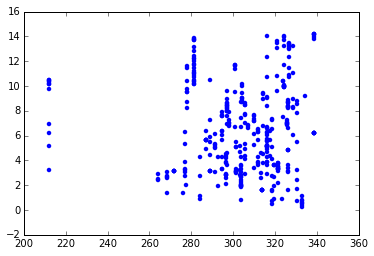

In [89]:
plt.scatter(cases['SCK2_CO'],cases['V_r'],linewidths=0)

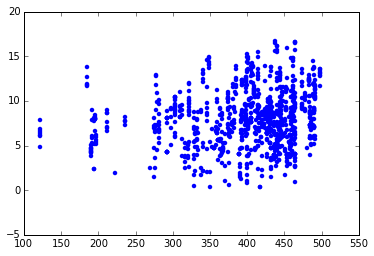

In [90]:
plt.scatter(nocases['SCK2_CO'],nocases['V_r'],linewidths=0)

In [97]:
np.mean(cases['SCK2_NO2'])

30.241932914371123

In [98]:
np.mean(nocases['SCK2_NO2'])

30.059089122847968

In [99]:
np.std(cases['SCK2_NO2'])

10.681283854599164

In [100]:
np.std(nocases['SCK2_NO2'])

7.4233113110237596

In [93]:
cases[cases.columns[7:-4]].apply(lambda x: x.corr(cases['SCK2_NO2']))

bearing(deg)   -0.042382
speed(m/s)      0.289725
distance(m)    -0.352870
SCK2_CO         0.035961
SCK2_NO2        1.000000
SCK2_TC        -0.087774
SCK2_RH        -0.818213
SCK2_LX        -0.105674
SCK2_DB        -0.280555
FS_TF          -0.003104
FS_RH          -0.774642
FS_WS           0.659528
FS_WD           0.310094
FS_UP           0.591585
FS_DN           0.515433
V_r             0.659733
dtype: float64

In [94]:
nocases[nocases.columns[7:-4]].apply(lambda x: x.corr(nocases['SCK2_NO2']))

bearing(deg)   -0.033848
speed(m/s)      0.064823
distance(m)    -0.271244
SCK2_CO        -0.221839
SCK2_NO2        1.000000
SCK2_TC        -0.141344
SCK2_RH        -0.330728
SCK2_LX         0.149939
SCK2_DB         0.251451
FS_TF           0.082144
FS_RH          -0.351334
FS_WS          -0.054244
FS_WD           0.246734
FS_UP          -0.126881
FS_DN          -0.245766
V_r             0.057166
dtype: float64

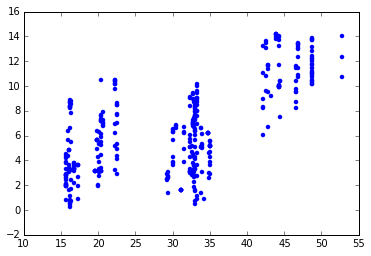

In [95]:
plt.scatter(cases['SCK2_NO2'],cases['V_r'],linewidths=0)

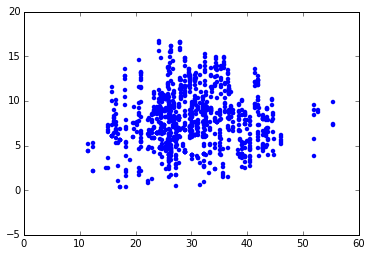

In [96]:
plt.scatter(nocases['SCK2_NO2'],nocases['V_r'],linewidths=0)